#### Insert header here with some info
Rolls-Royce Trent XWB-84 engine on Airbus A350-941

In [201]:
### Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [202]:
### Reading in Harlass et al. 2024 data

# Raw Data
A350_1_F20210414a = pd.read_csv(r'Harlass 2024 Cruise Data\ECLIF3-1_F03_20210414a_NOy_CO2.ames', delimiter='\t', skiprows=31)
A350_2_F20210416a = pd.read_csv(r'Harlass 2024 Cruise Data\ECLIF3-1_F04_20210416a_NOy_CO2.ames', delimiter='\t', skiprows=31)
A350_3_F20211106a = pd.read_csv(r'Harlass 2024 Cruise Data\ECLIF3-2_F03_20211106a_NOy_CO2.ames', delimiter='\t', skiprows=31)
A350_4_F20211119b = pd.read_csv(r'Harlass 2024 Cruise Data\ECLIF3-2_F11_20211119a_NOy_CO2.ames', delimiter='\t', skiprows=31)
A350_5_F20211127a = pd.read_csv(r'Harlass 2024 Cruise Data\ECLIF3-2_F15_20211127a_NOy_CO2.ames', delimiter='\t', skiprows=31)
A350_6_F20211129b = pd.read_csv(r'Harlass 2024 Cruise Data\ECLIF3-2_F17_20211129a__NOy_CO2.ames', delimiter='\t', skiprows=31)

# Fuel Flow vs EINOx
FF_11000m_df = pd.read_csv(r'Harlass 2024 Cruise Data\FF vs EINOx\FF vs EINOx 11000m.csv')

# EDB

In [203]:
### Cleaning data
A350_1_F20210414a_filtered = A350_1_F20210414a[(A350_1_F20210414a['NOy_ppb_high'] > -9999)].reset_index(drop=True)

FF_11000m_df.columns = ['Fuel Flow %', 'EINOx (g/kg)']          # Renaming

#### Exploring Raw Data
This is mostly a bad idea

Text(0, 0.5, 'NOx (ppb)')

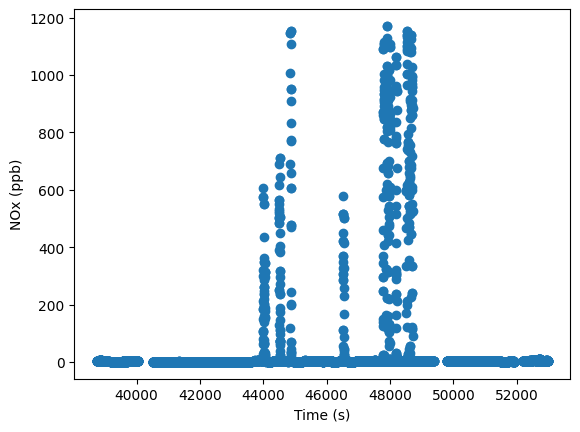

In [204]:
plt.scatter( A350_1_F20210414a[(A350_1_F20210414a['NOy_ppb_high'] > -9999)]['TIME_UTC_S'], A350_1_F20210414a[(A350_1_F20210414a['NOy_ppb_high'] > -9999)]['NOy_ppb_high'])
plt.xlabel('Time (s)')
plt.ylabel('NOx (ppb)')

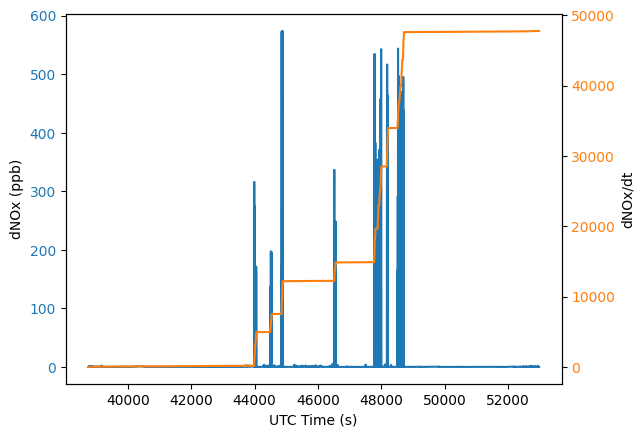

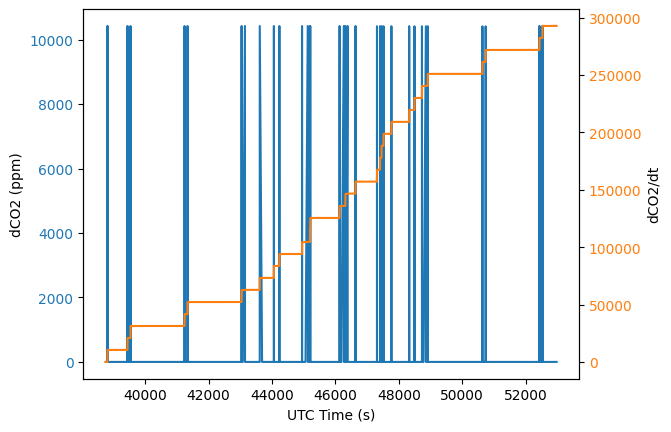

In [205]:
### Trying to mimic the Schulte graphs
A350_1_F20210414a_pos = A350_1_F20210414a[(A350_1_F20210414a['NOy_ppb_high'] > -9999)].reset_index(drop=True)

dNOx_dt = 0
dNOx_dts = [dNOx_dt]
dNOxs = [0]
for i, ppb_NOx in enumerate(A350_1_F20210414a_pos['NOy_ppb_high']):
    if i > 0:
        dNOx = abs(A350_1_F20210414a_pos.loc[i, 'NOy_ppb_high'] - A350_1_F20210414a_pos.loc[i-1, 'NOy_ppb_high'])       # NOTE: Probably shouldn't be absolute
        dt = A350_1_F20210414a_pos.loc[i, 'TIME_UTC_S'] - A350_1_F20210414a_pos.loc[i-1, 'TIME_UTC_S']
        dNOx_dt += dNOx / dt
        dNOxs.append(dNOx)
        dNOx_dts.append(dNOx_dt)


# Plotting
fig, ax1 = plt.subplots()
ax1.set_xlabel('UTC Time (s)')
ax1.set_ylabel('dNOx (ppb)')
ax1.tick_params(axis='y', labelcolor = 'C0')
ax1.plot(A350_1_F20210414a_pos['TIME_UTC_S'], dNOxs)

ax2 = ax1.twinx()
ax2.set_ylabel('dNOx/dt')
ax2.tick_params(axis='y', labelcolor = 'C1')
ax2.plot(A350_1_F20210414a_pos['TIME_UTC_S'], dNOx_dts, color='C1')


### CO2
A350_1_F20210414a_filtered = A350_1_F20210414a[(A350_1_F20210414a['CO2_ppm_Licor'] > -9999)].reset_index(drop=True)

dCO2_dt = 0
dCO2_dts = [dCO2_dt]
dCO2s = [0]
for i, ppm_CO2 in enumerate(A350_1_F20210414a_pos['CO2_ppm_Licor']):
    if i > 0:
        dCO2 = abs(A350_1_F20210414a_pos.loc[i, 'CO2_ppm_Licor'] - A350_1_F20210414a_pos.loc[i-1, 'CO2_ppm_Licor'])
        dt = A350_1_F20210414a_pos.loc[i, 'TIME_UTC_S'] - A350_1_F20210414a_pos.loc[i-1, 'TIME_UTC_S']
        dCO2_dt += dCO2 / dt
        dCO2s.append(dCO2)
        dCO2_dts.append(dCO2_dt)


# Plotting
fig, ax1 = plt.subplots()
ax1.set_xlabel('UTC Time (s)')
ax1.set_ylabel('dCO2 (ppm)')
ax1.tick_params(axis='y', labelcolor = 'C0')
ax1.plot(A350_1_F20210414a_pos['TIME_UTC_S'], dCO2s)

ax2 = ax1.twinx()
ax2.set_ylabel('dCO2/dt')
ax2.tick_params(axis='y', labelcolor = 'C1')
ax2.plot(A350_1_F20210414a_pos['TIME_UTC_S'], dCO2_dts, color='C1')

#### Exploring EINOx vs Fuel Flow Relationship

Text(0, 0.5, 'EI(NOx) (g/kg)')

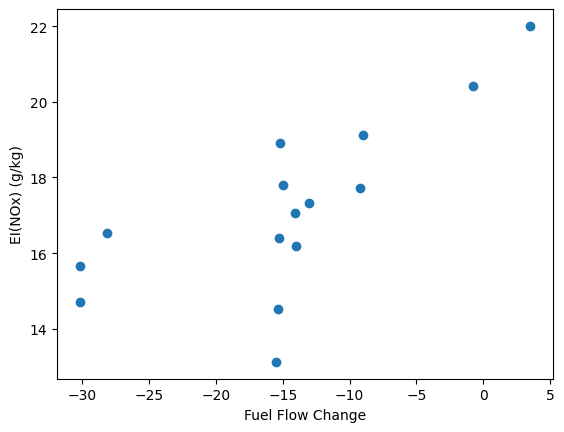

In [206]:
### Plotting
plt.scatter(FF_11000m_df['Fuel Flow %'], FF_11000m_df['EINOx (g/kg)'])
plt.xlabel('Fuel Flow Change')
plt.ylabel('EI(NOx) (g/kg)')

#### Boeing Fuel Flow Method

In [207]:
### EDB data, using Trent892 for proof of concept right now
fuel_flow_EDB = [0.3, 1, 3.1, 3.91]             # kg/s; idle, approach, C/O, takeoff
EINOx_EDB = [5.33, 11.58, 33.3, 45.7]           # g/kg; idle, approach, C/O, takeoff

# Trent XWB-84
xwb84_ff_EDB = [0.291, 0.801, 2.306, 2.819]     # kg/s; idle, approach, C/O, takeoff
xwb84_EINOx_EDB = [4.41, 11.12, 34.2, 45.24]    # g/kg; idle, approach, C/O, takeoff
np.interp(0.65, fuel_flow_EDB, EINOx_EDB)

8.455

In [223]:
### I should move this to its own class and change the input units
# Fuel flow in kg/s, press_amb in psia, temp_amb in R
def BFFM2(temp_amb, press_amb, mach, fuel_flow_alt, y = 0.5):       # y = 0.5 is default
    
    # Calculate fuel flow at sea level
    theta_amb = temp_amb / 518.67               # temp_amb in Rankine
    delta_amb = press_amb / 14.696              # press_amb in psia
    # theta_amb was to 3.3 in example?
    print(theta_amb)
    print(fuel_flow_alt)
    print(delta_amb)
    fuel_flow_sl = fuel_flow_alt * theta_amb ** 4.5 / delta_amb * np.exp(0.2 * mach ** 2)
    print(fuel_flow_sl)

    # Look up sea level EI(NOx) in EDB, need to use 4 point method (linear interp?)
    # This needs to change so can look up by engine type
    EINOx_sl = np.interp(fuel_flow_sl, EINOx_EDB, fuel_flow_EDB)

    # Calculate humidity ratio omega
    temp_amb_C = (temp_amb / 1.8) - 273.15                                  # Ambient temperature in Celsius
    press_sat = 6.107 * 10 ** (7.5 * temp_amb_C / (237.3 + temp_amb_C))
    rel_humidity = 0.6                                                      # Assumed from ICAO databank
    humidity_ratio = (0.62197058 * rel_humidity * press_sat) / (68.9473 * press_amb - press_sat * rel_humidity)
    H = (-19 * (humidity_ratio - 0.00634))

    # Calculate EI(NOx) at altitude
    # EINOx_alt = EINOx_sl * (pt3_alt / pt3_sl) ** y * np.exp(H)
    EINOx_alt = EINOx_sl * (delta_amb ** 1.02 / theta_amb ** 3.3) ** y * np.exp(H)
    return EINOx_alt

In [231]:
BFFM2(390, 2.854, 0.84, 0.882)

2.0409636822546795


#### TASOPT Fuel Flow Variations
Right now, this isn't even really a good idea since it still has issues with the compressor map efficiency
For BFFM2 need: Altitude, mach number, fuel flow, and time